In [41]:
import sqlite3
import pandas as pd

if __name__ == '__main__':
    con = sqlite3.connect("Data/database.sqlite")
    df_content = pd.read_sql_query("SELECT * from content ", con)
    df_artist = pd.read_sql_query("SELECT * from artists ", con)
    df_reviews =pd.read_sql_query("SELECT * from reviews ", con)
    df_years=pd.read_sql_query("SELECT * from years ", con)
    df_genre=pd.read_sql_query("SELECT * from genres", con)

In [43]:
df=df_content.join(df_reviews.set_index('reviewid'),on='reviewid')
df=df.join(df_genre.set_index('reviewid'), on='reviewid')

In [46]:
import numpy as np
df.genre.unique()

array(['electronic', 'metal', 'rock', None, 'rap', 'experimental',
       'pop/r&b', 'folk/country', 'jazz', 'global'], dtype=object)

In [7]:

adict={}
lst=[]
for i in df['author']:
    adict[i]=np.count_nonzero(df['author']==i)
    

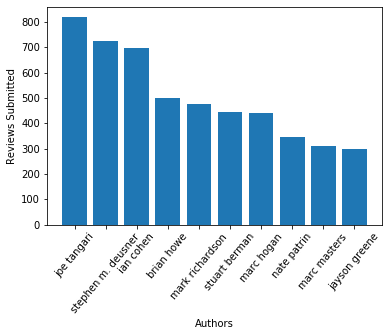

<Figure size 5760x7200 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from operator import itemgetter
x=[]
y=[]
for key, value in sorted(adict.items(), key=itemgetter(1),reverse=True):
    percent=value/df.shape[0]
    x.append(key)
    y.append(value)
plt.xticks(rotation=50)
plt.xlabel('Authors')
plt.ylabel('Reviews Submitted')
plt.bar(x[:10],y[:10])
plt.figure(figsize=(80,100))
prolific=x[:10]
plt.show()

In [9]:
df[['pub_year','author']]
yeardict={}
timedict={}
dif=[]
for i in df['author'].unique():
    start=min(df.groupby('author')['pub_year'].apply(list).loc[i])
    end=max(df.groupby('author')['pub_year'].apply(list).loc[i])
    years=[start,end]
    yeardict[i]=years
    timedict[i]=end-start
    




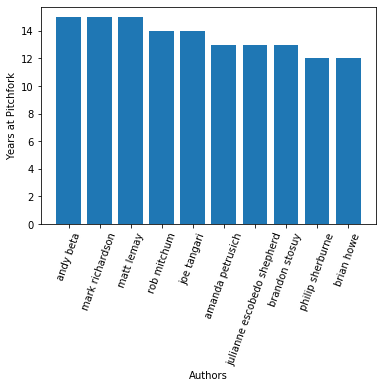

<Figure size 5760x720 with 0 Axes>

In [10]:

x=[]
y=[]
for key, value in sorted(timedict.items(), key=itemgetter(1),reverse=True):
    x.append(key)
    y.append(value)
plt.xticks(rotation=70)
plt.xlabel('Authors')
plt.ylabel('Years at Pitchfork')
plt.bar(x[:10],y[:10])
plt.figure(figsize=(80,10))
Time=x[:10]
plt.show()

In [11]:
scoredict={}
for i in df['author'].unique():
    mx=max(df.groupby('author')['score'].apply(list).loc[i])
    small=min((df.groupby('author')['score'].apply(list).loc[i]))
    med=sum((df.groupby('author')['score'].apply(list).loc[i]))/len((df.groupby('author')['score'].apply(list).loc[i]))
    scoredict[i]=[small, med, mx]

print(scoredict)

{'nate patrin': [2.8, 7.041498559077809, 10.0], 'zoe camp': [4.0, 6.788405797101448, 8.7], 'david glickman': [6.9, 7.275, 7.9], 'jenn pelly': [6.5, 8.056097560975608, 9.2], 'kevin lozano': [3.5, 6.972549019607843, 8.7], 'vanessa okoth-obbo': [6.1, 6.785714285714286, 7.8], 'katherine st. asaph': [4.0, 6.636538461538464, 8.6], 'andy beta': [2.5, 7.468800000000003, 10.0], 'ian cohen': [0.2, 6.3539341917024315, 10.0], 'marc masters': [4.3, 7.4689102564102585, 9.8], 'sheldon pearce': [4.4, 6.950877192982455, 8.6], 'thea ballard': [6.2, 7.263636363636365, 8.2], 'marcus j. moore': [3.5, 7.162790697674417, 9.4], 'dean van nguyen': [5.0, 6.923076923076922, 8.7], 'louis pattison': [6.0, 7.173684210526316, 8.5], 'philip sherburne': [4.0, 7.565550239234451, 9.7], 'benjamin scheim': [5.9, 7.217241379310345, 8.5], 'rebecca haithcoat': [4.8, 6.777777777777779, 8.4], 'sam sodomsky': [5.3, 7.292857142857143, 8.5], 'seth colter walls': [4.5, 7.724137931034484, 9.1], 'brian howe': [2.8, 7.057600000000014

In [12]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [13]:
print(Time)
print(prolific)
    

['andy beta', 'mark richardson', 'matt lemay', 'rob mitchum', 'joe tangari', 'amanda petrusich', 'julianne escobedo shepherd', 'brandon stosuy', 'philip sherburne', 'brian howe']
['joe tangari', 'stephen m. deusner', 'ian cohen', 'brian howe', 'mark richardson', 'stuart berman', 'marc hogan', 'nate patrin', 'marc masters', 'jayson greene']


In [14]:
y=df['author']
atm = (y=='andy beta')| (y== 'mark richardson')| (y==  'matt lemay')| (y==  'rob mitchum')| (y==  'joe tangari')| (y==  'amanda petrusich')| (y==  'julianne escobedo shepherd')|(y==  'brandon stosuy')| (y==  'philip sherburne')| (y==  'brian howe')
apm = (y=='joe tangari')| (y== 'stephen m. deusner')| (y== 'ian cohen')| (y== 'brian howe')| (y== 'mark richardson')| (y== 'stuart berman')| (y== 'marc hogan')| (y== 'nate patrin')| (y== 'marc masters')| (y== 'jayson greene')
df_t = df[atm]
df_p = df[apm]

X_train,X_test,y_train,y_test = train_test_split(df_t['content'],df_t['best_new_music'],test_size=0.2)

In [15]:

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X_train)
X_vec = vectorizer.transform(X_train).toarray()

In [16]:
vocab = np.array(vectorizer.get_feature_names())
print(vocab.shape)
vocab[-5:]

sorted_idx = np.argsort(np.sum(X_vec, axis=0))[::-1]
vocab[sorted_idx[:10]]

(53811,)


array(['like', 'music', 'album', 'band', 'songs', 'sound', 'song',
       'guitar', 'record', 'rock'], dtype='<U57')

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', use_idf=False)
vectorizer.fit(X_test)
vocab = np.array(vectorizer.get_feature_names())
X_vec = vectorizer.transform(X_test).toarray()
sorted_idx = np.argsort(np.max(X_vec, axis=0))[::-1]
vocab[sorted_idx[:10]]

array(['burma', 'dylan', 'drake', 'guitar', 'benson', 'adams', 'rock',
       'jones', 'cohen', 'beam'], dtype='<U21')

In [54]:
X_train,X_test,y_train,y_test = train_test_split(df_p['content'],df_p['best_new_music'],test_size=0.2)

vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(X_train)
X_vec = vectorizer.transform(X_train).toarray()

vocab = np.array(vectorizer.get_feature_names())
print(vocab.shape)
print(vocab[-5:])

sorted_idx = np.argsort(np.sum(X_vec, axis=0))[::-1]
vocab[sorted_idx[:10]]
vectorizer = TfidfVectorizer(stop_words='english', use_idf=False)
vectorizer.fit(X_test)
vocab = np.array(vectorizer.get_feature_names())
X_vec = vectorizer.transform(X_test).toarray()
sorted_idx = np.argsort(np.max(X_vec, axis=0))[::-1]
print(vocab[sorted_idx[:10]])

(63354,)
['über' 'ür' 'þú' 'čapek' 'край']
['man' 'christmas' 'elvis' 'lust' 'lekman' 'hannon' 'oasis' 'molina'
 'curren' 'merritt']


In [57]:
top_10s = []
for i in prolific:
    maski = (y==i)
    X = df[maski]
    vec_i = TfidfVectorizer(stop_words='english')
    X_vec_i = vec_i.fit_transform(X['content']).toarray()
    vocab = np.array(vec_i.get_feature_names())
    sorted_idx = np.argsort(np.mean(X_vec_i, axis=0))[::-1]
    top_10s.append(list(vocab[sorted_idx[1:11]]))

/home/spsabin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


ValueError: cannot reindex from a duplicate axis

Index(['reviewid', 'content', 'title', 'artist', 'url', 'score',
       'best_new_music', 'author', 'author_type', 'pub_date', 'pub_weekday',
       'pub_day', 'pub_month', 'pub_year', 'genre'],
      dtype='object')

In [21]:
top_10s

[['album',
  'like',
  'music',
  'song',
  'guitar',
  'songs',
  'sound',
  'just',
  'rock',
  'time'],
 ['songs',
  'album',
  'band',
  'song',
  'sound',
  'sounds',
  'music',
  'new',
  'rock',
  'just'],
 ['band',
  'just',
  'rock',
  'album',
  'record',
  'time',
  'sound',
  'pop',
  'music',
  'songs'],
 ['music',
  'album',
  'rock',
  'songs',
  'band',
  'guitar',
  'pop',
  'record',
  'sound',
  'piano'],
 ['like',
  'sound',
  'album',
  'songs',
  'record',
  'tracks',
  'band',
  'sounds',
  'guitar',
  'song'],
 ['like',
  'album',
  'rock',
  'song',
  'pop',
  'songs',
  'new',
  'just',
  'time',
  'music'],
 ['pop',
  'album',
  'love',
  'band',
  'songs',
  'song',
  'just',
  'new',
  'rock',
  'guitar'],
 ['album',
  'music',
  'just',
  'way',
  'sound',
  'tracks',
  'funk',
  'track',
  'time',
  'rap'],
 ['music',
  'album',
  'band',
  'sound',
  'sounds',
  'songs',
  'noise',
  'guitar',
  'track',
  'way'],
 ['music',
  'album',
  'song',
  'rap',

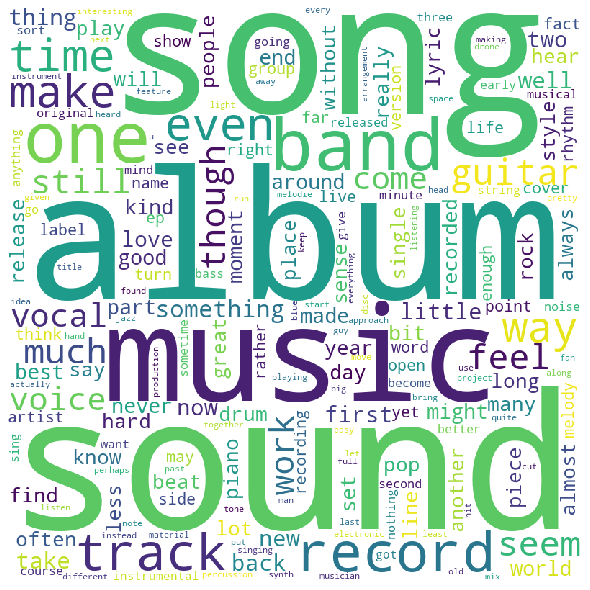

In [50]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_t.content: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [48]:
from sklearn.decomposition import NMF as NMF_sklearn
from src.code import build_text_vectorizer, hand_label_topics, analyze_article, NMF
from nltk.corpus import stopwords

contents = df_p.content
web_urls = df_p.url

# Build our text-to-vector vectorizer, then vectorize our corpus.
vectorizer, vocabulary = build_text_vectorizer(contents,
                             use_tfidf=True,
                             use_stemmer=True,
                             max_features=1000)
X = vectorizer(contents)

nmf = NMF_sklearn(n_components=10, max_iter=200, alpha=0.2)
W = nmf.fit_transform(X)
H = nmf.components_
print('reconstruction error:', nmf.reconstruction_err_/1.5)

hand_labels = hand_label_topics(H, vocabulary)
rand_articles = np.random.choice(range(len(W)), 15)


/home/spsabin/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/spsabin/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


reconstruction error: 41.565179515916775
topic 0
--> like get thing feel make go time there' realli even way peopl know think much someth one i'm say good
please label this topic: t

topic 1
--> sound like drone track nois feel electron minut loop piec sonic tone seem record space beat synth guitar ambient album
please label this topic: t

topic 2
--> rap rapper hip hop he' beat like rhyme vers black produc flow shit product b album guest sampl r money
please label this topic: t

topic 3
--> record disc version releas live year song set track two album origin cover one materi first reissu singl compil includ
please label this topic: t

topic 4
--> song sound sing album like countri voic songwrit folk lyric love singer even blue cover new life old may make
please label this topic: t

topic 5
--> pop love indi synth girl like boy new danc debut song singl heart hous beach dream titl electro ep recent
please label this topic: t

topic 6
--> guitar song album vocal band' melodi band drum i

In [82]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/spsabin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
rand_articles = np.random.choice(range(len(W)), 15)

for i in rand_articles:
    try:
        print(df_p['artist'][i],df_p['title'][i])
        analyze_article(i, contents, web_urls, W, hand_labels)
    except KeyError:
        continue

In [32]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
lr=LogisticRegression(multi_class='over',random_state=1,solver='lbfgs')
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
lr.fit(X_train_pca,y_train)

X=X_train_pca
y=y_train

resolution=0.2
markers=('s','x','o','^','v')
colors =('red','lightgreen','gray','cyan','blue')
cmap=ListedColormap(colors[:len(np.unique(y))])

x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))

Z=lr.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z=Z.reshape(xx1.shape)
plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
plt.xlim(xx1.min(),xx1.max())
plt.ylim(xx2.min(),xx2.max())

for i,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==c1,0],y=X[y==c1,1],alpha=0.6,color=cmap(i), edgecolor='black',marker=markers[i],label=c1)

ValueError: could not convert string to float: 'Like a Mountain Goats for the syrup-sipping set, Bill\r\n    Callahan\'s mellow baritone a credible estimate of how John Darnielle\'s\r\n    reedy keen would sound slowed to a chopped-and-screwed crawl. Lyrically, each\r\n    musician sharpens the raw stuff of physical and emotional experience\r\n    against his perception like a blade on a whetstone until only the\r\n    essential edges-- furniture, streams and mountains; bitterness,\r\n    pettiness, rage and redemption-- remain. But while Darnielle has\r\n    slanted fuller and more direct over the years, Callahan has become\r\n    smaller and more enigmatic. His most recent LP, A River Ain\'t Too Much to Love,\r\n    found him settled deeply into a languid folk-waltz mode, his voice like\r\n    something falling down a well, his once-convulsive exploratory\r\n    sensibility turned calm and shamanistic.\r\n    Given the mossy inevitability that grows on Callahan\'s rock-steady voice, it seems only right that the Rock Bottom Riser\r\n    EP-- featuring two tracks from the aforementioned album, two new songs,\r\n    and two videos-- stays the course. Callahan\'s songs feel worn-in and\r\n    effortless; his voice coasting across guitars so languid they sound\r\n    wet, and his focus has turned from damnation to redemption. The songs\r\n    are easy to summarize but difficult to concisely illuminate; they\'re\r\n    like parachutes-- complex folds of family history, abstruse wisdom, and\r\n    reverent naturalism packed tightly beneath plain, simple integuments.\r\n    Always handy with aphorisms, Callahan by now is less the provocateur\r\n    than the sage to whom abstractions like "God is a word/ And the\r\n    argument ends there" and "Humiliation is good/ It means you believe in\r\n    something" have become so transparent that they require no\r\n    amplification.\r\n    No song on the album or this EP embodied redemption more fully than\r\n    "Rock Bottom Riser", a glassy waltz dappled with Joanna Newsom\'s piano.\r\n    Callahan conjures up subtle onomatopoeias: His voice sinks with a heavy\r\n    plunk on the first half of the line "I am a rock/ Bottom riser," gently\r\n    rises on the second; it dives as it intones the word "diving." The\r\n    corporeal squeak of calluses on nylon strings asserts the body; the\r\n    tight spidery arpeggio loosens and lightly opens; a voice that\r\n    initially sounds like a weight trying to carry itself begins to drift\r\n    buoyantly; and Callahan\'s body is pulled from "this mighty river." The\r\n    "Rock Bottom Riser" video features trippy animation that\'s actually\r\n    pretty mesmerizing, a swirling slideshow of vaguely Japanese brushwork\r\n    flowing lithely over rice paper. "I Feel like the Mother of the World"\r\n    is a long, sparkly exhalation, a shifty parable about empathy and\r\n    responsibility. Its video finds Callahan playing a TV newscaster,\r\n    arms-crossed and cocky in front of disaster footage, to Chloe Sevigny\'s\r\n    harried and eye-patched maid. The juxtaposition of Sevigny\'s pathetic\r\n    plight and Callahan\'s droll detachment is evocative of the cruel streak\r\n    latent in his music, still haunted by a univocal and remote\r\n    talking-head quality.\r\n    \r\n    If the videos are compelling but inessential, the two new songs are far\r\n    from toss-offs. "Bowery", where Callahan\'s voice blows in lovely gusts\r\n    through silky guitars and small chimes, is whittled down to a white-hot\r\n    emotional point: In beatific tones, Callahan watches his father try to\r\n    find his bowery-bum grandfather\'s bones ("And to his trials I added my\r\n    own," he admits), a multigenerational saga welling up tacitly between\r\n    the sparsely rendered lines. And the easy hitch and roll of "Fool\'s\r\n    Lament" finds Callahan in a slyly instructive mode, Aesop without the\r\n    animals: As emerges through boasts like "I\'m already ready/ For my\r\n    great reward" and "I see things clearly/ Or not at all," Callahan\'s\r\n    fool is exactly the kind he\'ll never be: The one who thinks the world\r\n    is here to be mastered and suborned, rather than poked, prodded,\r\n    caressed and observed.\r\n    '